In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DataFiles/IRIS.csv")

### Data Cleaning

In [54]:
df[df.isnull().any(axis =1)]

,sepal_length,sepal_width,petal_length,petal_width,species


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


### Feature Engineering/Preprocession

In [10]:
df["species"] = df["species"].astype("category").cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [60]:
# df[df["species"]==3]

,sepal_length,sepal_width,petal_length,petal_width,species


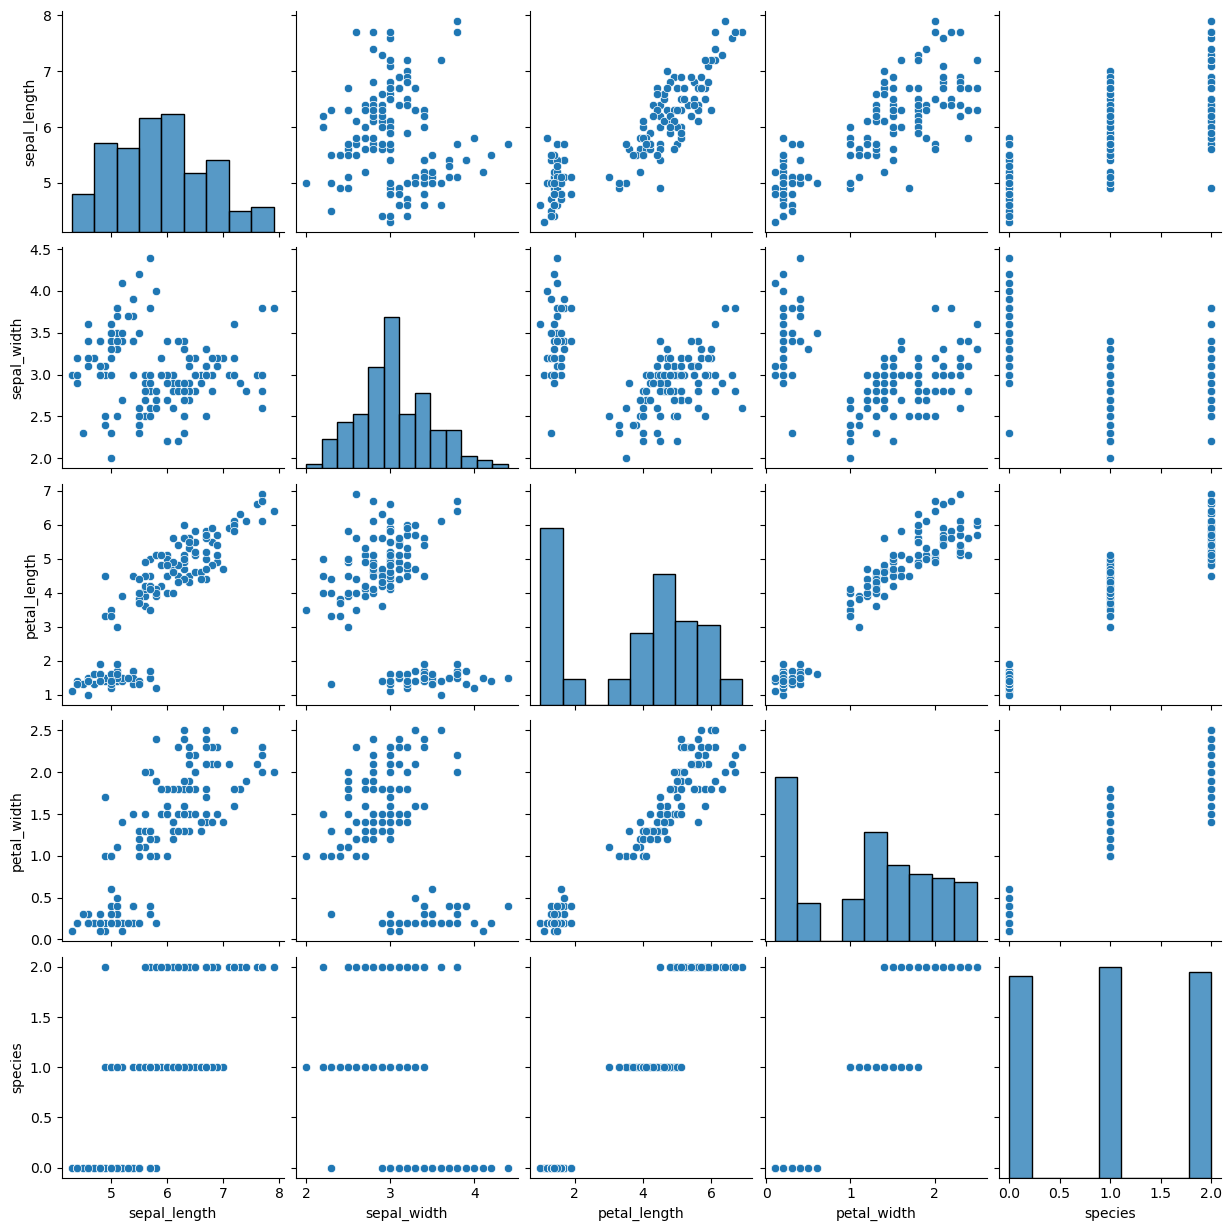

In [11]:
sns.pairplot(df)

In [12]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


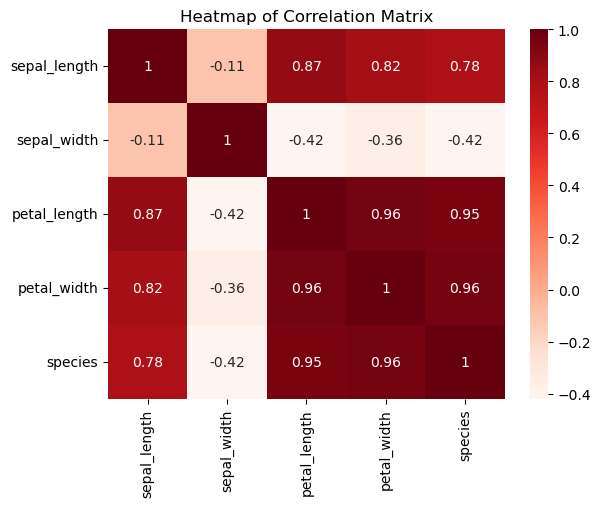

In [13]:
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

#Feature and target variable
x =df.drop('species',axis=1)
y=df['species']

#split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
#Import the LogisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression model
logistic_model =LogisticRegression()

#Fit the model to the training data(x_train,y_train)
logistic_model.fit(x_train,y_train)

LogisticRegression()

### Validating Logistic Regression

In [17]:
y_train

95     1
143    2
110    2
0      0
75     1
      ..
73     1
108    2
14     0
94     1
104    2
Name: species, Length: 102, dtype: int8

In [18]:
y_pred_logistic=logistic_model.predict(x_test)

In [19]:
y_pred_logistic

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int8)

In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Logical Regression Results:")
print("Accuracy",accuracy_score(y_test,y_pred_logistic))

Logical Regression Results:
Accuracy 0.9333333333333333


In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
x =df[['sepal_length', 'petal_length', 'petal_width']]
y =df['species']
#split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [23]:
#Import the LogisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression model
logistic_model =LogisticRegression()

#Fit the model to the training data(x_train,y_train)
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred_logistic=logistic_model.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Logical Regression Results:")
print("Accuracy",accuracy_score(y_test,y_pred_logistic))

Logical Regression Results:
Accuracy 0.8666666666666667
